#### WLPR: liquid production rate
#### WOPR:  oil production rate
#### WWPR:  water production rate
####  WWIR: water injection rate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Caminho do CSV
csv_path = "C:/Users/calva/OneDrive/Documentos/Doutorado_PUC/benchmark/OPM_Egg_uma_realizacao/EGG_MODEL_ECL_production.csv"

# Carrega os dados
df = pd.read_csv(csv_path, parse_dates=["DATE"])
df.set_index("DATE", inplace=True)

# Identifica os 4 poços produtores (ignorando INJECT)
wells = sorted(set(col.split(":")[1] for col in df.columns if ':' in col and "INJECT" not in col))[:4]

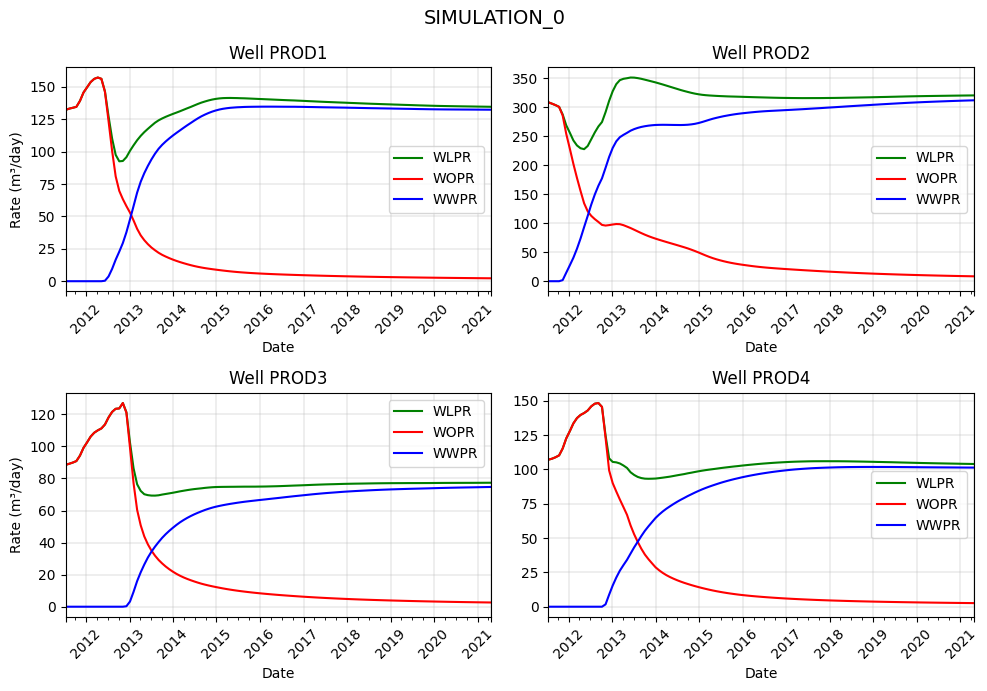

In [3]:
# Configura o layout: 2 linhas x 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Cores por variável
colors = {
    "WLPR": "green",
    "WOPR": "red",
    "WWPR": "blue"
}

# Plota cada poço
for idx, well in enumerate(wells):
    row, col = divmod(idx, 2)
    ax = axes[row][col]
    
    for var in ["WLPR", "WOPR", "WWPR"]:
        colname = f"{var}:{well}"
        if colname in df.columns:
            df[colname].plot(ax=ax, label=var, color=colors[var])
    
    ax.set_title(f"Well {well}")
    ax.set_xlabel("Date")
    ax.grid(lw=0.3)
    ax.tick_params(axis='x', rotation=45)  # Inclina as datas
    if col == 0:
        ax.set_ylabel("Rate (m³/day)")
    ax.legend()
    
plt.suptitle("SIMULATION_0", fontsize=14)
plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


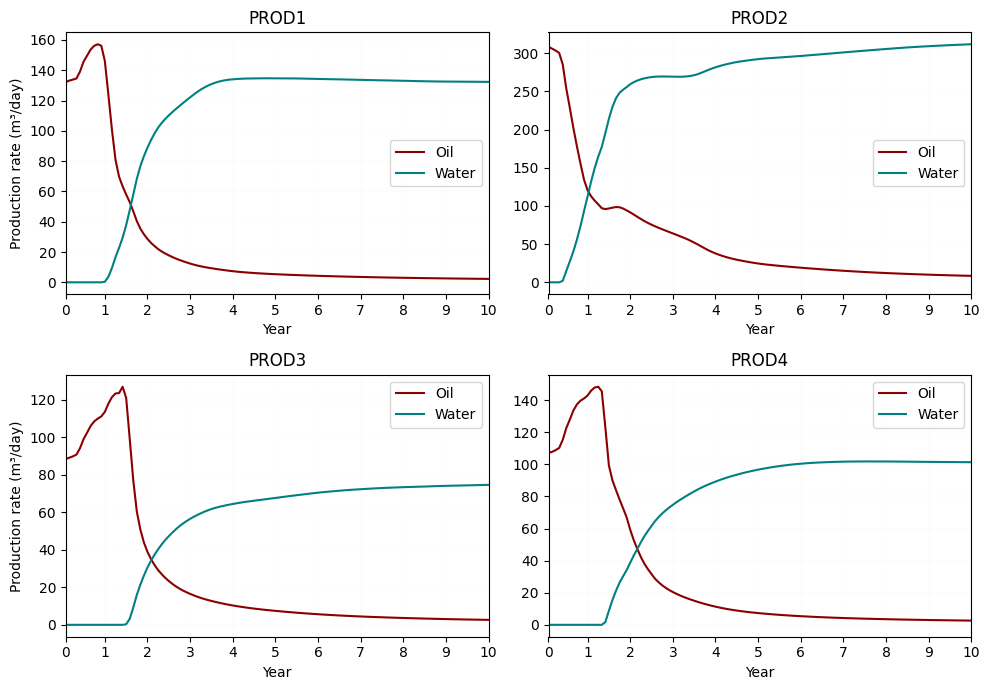

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

colors = {
    "WOPR": "darkred",
    "WWPR": "teal"
}

n_points = len(df)
# Define os ticks em posição 0 a 10, espalhados ao longo do índice
tick_positions = np.linspace(0, n_points-1, 11, dtype=int)
tick_labels = np.linspace(0, 10, 11, dtype=int)

labels = {"WOPR": "Oil", "WWPR": "Water"}

for idx, well in enumerate(wells):
    row, col = divmod(idx, 2)
    ax = axes[row][col]
    
    for var in ["WOPR", "WWPR"]:
        colname = f"{var}:{well}"
        if colname in df.columns:
            ax.plot(df.index, df[colname], label=labels[var], color=colors[var])
    
    ax.set_title(f"{well}")
    ax.set_xlabel("Year")
    ax.grid(color="0.94", lw=0.1)
    ax.set_xlim(df.index[0], df.index[-1])
    if col == 0:
        ax.set_ylabel("Production rate (m³/day)")
    ax.legend()
    
    # Ajusta os ticks do eixo x
    ax.set_xticks(df.index[tick_positions])
    ax.set_xticklabels(tick_labels)
    
plt.tight_layout()
output_path = r"C:\Users\calva\OneDrive\Documentos\Doutorado_PUC\paper_com_Bratvold\sn-article-template\production_plot.eps"
plt.savefig(output_path, format="eps", dpi=300, bbox_inches="tight")
plt.show()

